# モデルの比較

色々なモデルで感情曲線を作成し，結果を比較する

In [1]:
import sys
import numpy as np
from tqdm import tqdm
import pandas as pd
from pathlib import Path
import japanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
# 指定されたwindowサイズで感情スコアの平均値を取得
def get_score_mean(scores, window_size=10, score_mean_num=100):
    score_mean = []
    slide = int((len(scores) - window_size - 1) / 99)
    for n in range(score_mean_num):
        start = slide * n
        if n == score_mean_num - 1:
            end = len(scores) - 1
        else:
            end = start + window_size
        score_mean.append(np.mean(scores[start:end]))
        # print(f'{n}:len(scores):{len(scores)},st:{start},ed:{end},{scores[end]}{np.array(scores)[-1]}')
    return score_mean

In [3]:
# スコアを0-1に規格化
def score_normalize(scores):
    return (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

In [4]:
# パスリストからスコア値を取得
def get_score_from_path(path_list):
    score_list = []
    for path in path_list:
        score = pd.read_csv(path, index_col=0)
        # 移動平均
        window_size = int(len(score) / 5)
        score_mean = get_score_mean(score['logit_score'], window_size=window_size)
        # 規格化
        score_norm = score_normalize(score_mean)
        score_list.append(score_norm)
    return score_list

In [6]:
# 感情曲線比較
def compare_sentiment_arc(score_list, path_list, dtw_list, suptitle):
    plt.figure(figsize=(6*len(score_list), 5))
    plt.suptitle(suptitle, fontsize=20)
    for i, score in enumerate(score_list):
        plt.subplot(1, len(score_list), i+1)
        plt.title(path_list[i].split('/')[1], fontsize=18)
        plt.xlabel(f'(dtw: {dtw_list[i]})', fontsize=15)
        plt.plot(score)
    plt.tight_layout()

## フランダースの犬

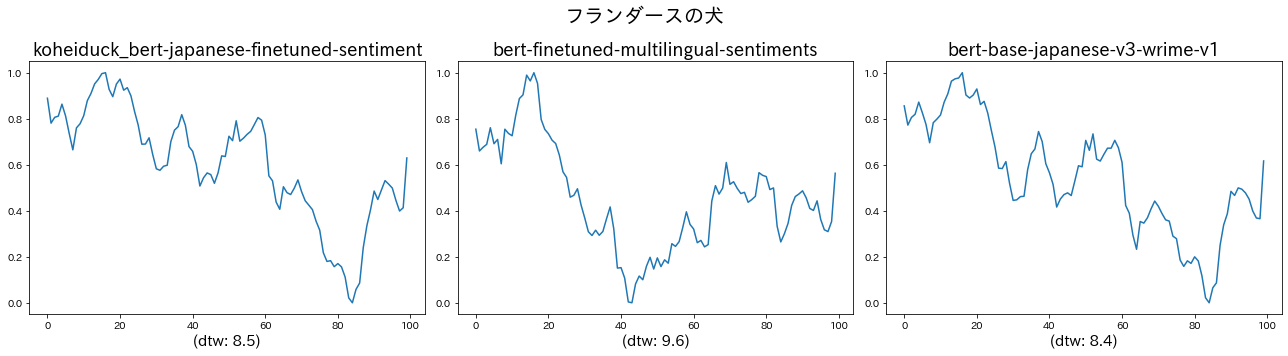

In [11]:
path_list = [
    'data/koheiduck_bert-japanese-finetuned-sentiment/nero_score.csv',
    'data/bert-finetuned-multilingual-sentiments/nero_score.csv',
    'data/bert-base-japanese-v3-wrime-v1/nero_score.csv'
]
# CSVから読み込み
dtw_list = [8.5, 9.6, 8.4]

score_list = get_score_from_path(path_list)
compare_sentiment_arc(score_list, path_list, dtw_list, 'フランダースの犬')

## 銀河鉄道の夜

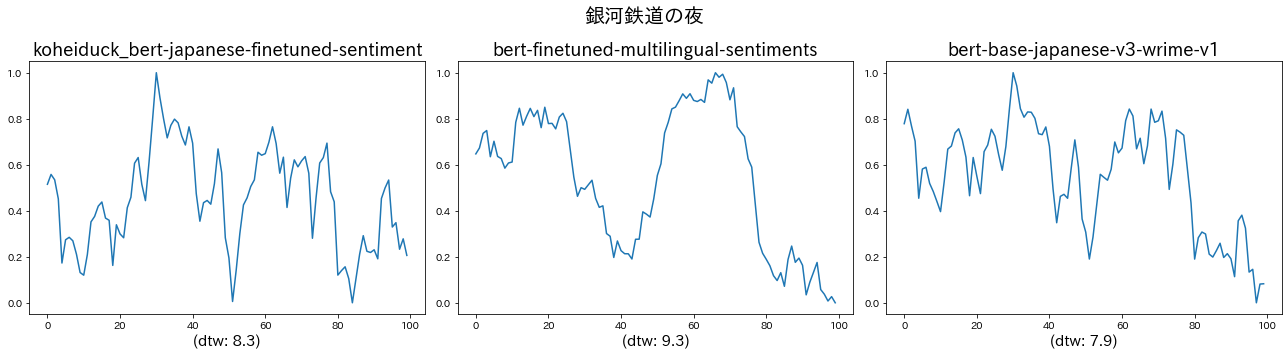

In [13]:
# CSVから読み込み
path_list = [
    'data/koheiduck_bert-japanese-finetuned-sentiment/ginga_score.csv',
    'data/bert-finetuned-multilingual-sentiments/ginga_score.csv',
    'data/bert-base-japanese-v3-wrime-v1/ginga_score.csv'
]
dtw_list = [8.3, 9.3, 7.9]

score_list = get_score_from_path(path_list)
compare_sentiment_arc(score_list, path_list, dtw_list, '銀河鉄道の夜')

## 押絵と旅する男

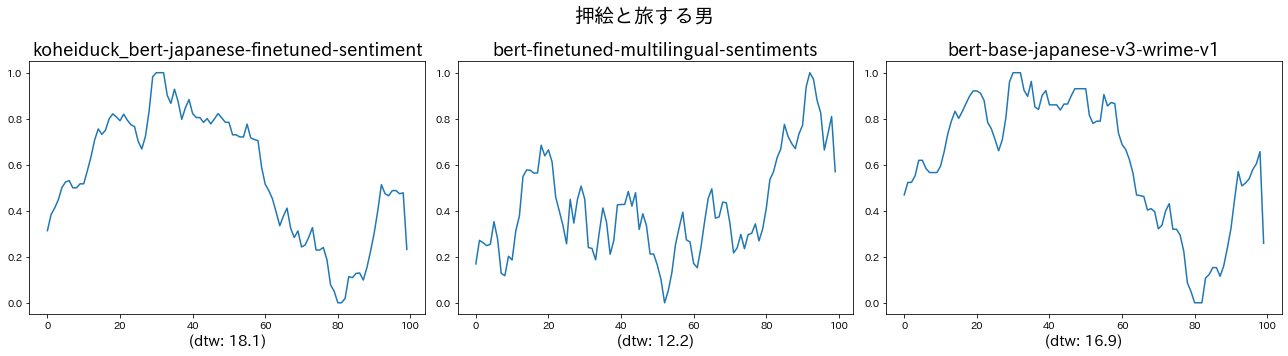

In [14]:
# CSVから読み込み
path_list = [
    'data/koheiduck_bert-japanese-finetuned-sentiment/oshie_score.csv',
    'data/bert-finetuned-multilingual-sentiments/oshie_score.csv',
    'data/bert-base-japanese-v3-wrime-v1/oshie_score.csv'
]
dtw_list = [18.1, 12.2, 16.9]

score_list = get_score_from_path(path_list)
compare_sentiment_arc(score_list, path_list, dtw_list, '押絵と旅する男')